In [1]:
# Setup: carregar el CSV i preparar columnes útils
import pandas as pd
import numpy as np

# Llegeix el CSV. Nota: alguns camps són strings numèrics; els convertirem a numèrics.
#df = pd.read_csv('climate_change.csv')
df = pd.read_csv('climate_change_realistic.csv')

print('Files, Columnes:', df.shape)
print('Columnes:', list(df.columns))
df.head(5)

Files, Columnes: (10000, 15)
Columnes: ['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Adaptation_Strategies', 'Economic_Impact_Million_USD']


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,1990,China,North,Wheat,4.054009,1702.868802,23.91,0.500000,4,46.96,29.73,46.67,34.2665,Organic Farming,235.846450
1,1990,Brazil,Northeast,Sugarcane,2.471762,755.287709,26.60,1.167403,3,64.28,10.28,73.15,49.1425,Water Management,122.068229
2,1990,Argentina,Pampas,Wheat,14.863470,1046.879067,25.88,2.044037,8,57.06,20.34,60.94,60.4730,No Adaptation,1341.260594
3,1990,Nigeria,North West,Barley,30.235626,2234.985037,15.67,1.639189,9,40.47,31.58,44.36,72.8620,Organic Farming,1473.343779
4,1990,Argentina,Pampas,Vegetables,17.447238,1500.588450,18.70,1.053776,3,42.85,12.24,53.53,29.3135,Crop Rotation,362.816039


In [2]:
df_small = df.loc[:, ['Country']].copy()
df_small['Country'].unique()

array(['China', 'Brazil', 'Argentina', 'Nigeria', 'France', 'USA',
       'Australia', 'Russia', 'India', 'Canada'], dtype=object)

In [13]:
df_small_regions = df.loc[:, ['Region']].copy()
df_small_regions['Region'].unique()

array(['North', 'Northeast', 'Pampas', 'North West', 'Northwest',
       'Provence-Alpes-Cote d’Azur', 'East', 'West', 'Western Australia',
       'South', 'Midwest', 'Central', 'Siberian', 'South West',
       'Northwestern', 'Volga', 'New South Wales', 'Punjab', 'Victoria',
       'Queensland', 'North Central', 'Southeast', 'British Columbia',
       'Patagonia', 'Quebec', 'Nouvelle-Aquitaine', 'Maharashtra',
       'Ile-de-France', 'Tamil Nadu', 'Prairies', 'South East',
       'West Bengal', 'Grand Est', 'Ontario'], dtype=object)

In [17]:
mask0 = (df['Year'] == 2024) & (df['Country'] == 'Brazil')
filtered0 = df.loc[mask0, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
print(filtered0.head(20))

      Year Country     Region   Crop_Type  Average_Temperature_C  \
9719  2024  Brazil      South      Coffee              30.691466   
9727  2024  Brazil  Southeast   Sugarcane              18.159890   
9735  2024  Brazil      North    Soybeans              31.282562   
9739  2024  Brazil  Southeast        Rice               0.667640   
9751  2024  Brazil  Northeast       Wheat              18.938843   
9754  2024  Brazil  Southeast        Corn              10.503646   
9758  2024  Brazil  Southeast      Cotton              25.438140   
9760  2024  Brazil  Northeast        Rice              10.500763   
9778  2024  Brazil  Northeast      Barley              28.912385   
9785  2024  Brazil      North   Sugarcane               8.335191   
9833  2024  Brazil      South        Rice              21.792937   
9841  2024  Brazil  Northeast       Wheat              17.530955   
9843  2024  Brazil      South      Cotton              27.059184   
9854  2024  Brazil  Northeast      Cotton       

In [18]:
#Filtra con booleanos
mask = (df['Year'] == 2024) & (df['Country'] == 'Brazil') & (df['Region'] == 'North') 
filtered = df.loc[mask, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
print(filtered.head(20))

      Year Country Region  Crop_Type  Average_Temperature_C  \
9735  2024  Brazil  North   Soybeans              31.282562   
9785  2024  Brazil  North  Sugarcane               8.335191   
9883  2024  Brazil  North     Coffee               3.158023   
9916  2024  Brazil  North     Cotton              13.545483   

        Adaptation_Strategies  Economic_Impact_Million_USD  
9735            Crop Rotation                  1387.533651  
9785  Drought-resistant Crops                   883.692045  
9883  Drought-resistant Crops                   394.765330  
9916         Water Management                   416.024500  


In [19]:
#Ordena por año
mask = (df['Country'] == 'Brazil') & (df['Region'] == 'North') 
filtered = df.loc[mask, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
orden = filtered.sort_values(by=['Year'], ascending=[True])
orden.head(20)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Adaptation_Strategies,Economic_Impact_Million_USD
148,1990,Brazil,North,Cotton,28.734018,Organic Farming,1434.869311
181,1990,Brazil,North,Vegetables,32.281665,No Adaptation,510.174489
312,1991,Brazil,North,Wheat,0.000000,Water Management,141.910120
335,1991,Brazil,North,Corn,19.451755,Water Management,1725.338651
398,1991,Brazil,North,Soybeans,20.859410,No Adaptation,669.054911
411,1991,Brazil,North,Corn,24.716291,Water Management,0.000000
456,1991,Brazil,North,Coffee,26.624617,Crop Rotation,0.000000
462,1991,Brazil,North,Cotton,11.808415,No Adaptation,706.471049
467,1991,Brazil,North,Vegetables,5.613279,Water Management,1316.288014
469,1991,Brazil,North,Wheat,27.677335,Drought-resistant Crops,897.987323


In [20]:
mask2 = (df['Year'] == 1990) & (df['Country'] == 'Brazil') & (df['Region'] == 'North') 
filtered2 = df.loc[mask2, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
filtered2.head(20)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Adaptation_Strategies,Economic_Impact_Million_USD
148,1990,Brazil,North,Cotton,28.734018,Organic Farming,1434.869311
181,1990,Brazil,North,Vegetables,32.281665,No Adaptation,510.174489


In [22]:
mask3 = (df['Year'].isin([1990, 1995, 2000, 2005, 2010,2015, 2020, 2024])) & (df['Country'] == 'Brazil') & (df['Region'] == 'North')  & (df['Crop_Type'] == 'Wheat') 
filtered3 = df.loc[mask3, ['Year','Country','Region','Crop_Type','Average_Temperature_C','Adaptation_Strategies','Economic_Impact_Million_USD']]
orden2 = filtered3.sort_values(by=['Year'], ascending=[True])
orden2.head(20)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Adaptation_Strategies,Economic_Impact_Million_USD
1430,1995,Brazil,North,Wheat,24.855570,Organic Farming,724.130760
3065,2000,Brazil,North,Wheat,10.872390,Organic Farming,329.391069
4394,2005,Brazil,North,Wheat,26.674727,No Adaptation,569.489353
7269,2015,Brazil,North,Wheat,23.056732,Crop Rotation,888.808489
8583,2020,Brazil,North,Wheat,14.334548,No Adaptation,3055.300904


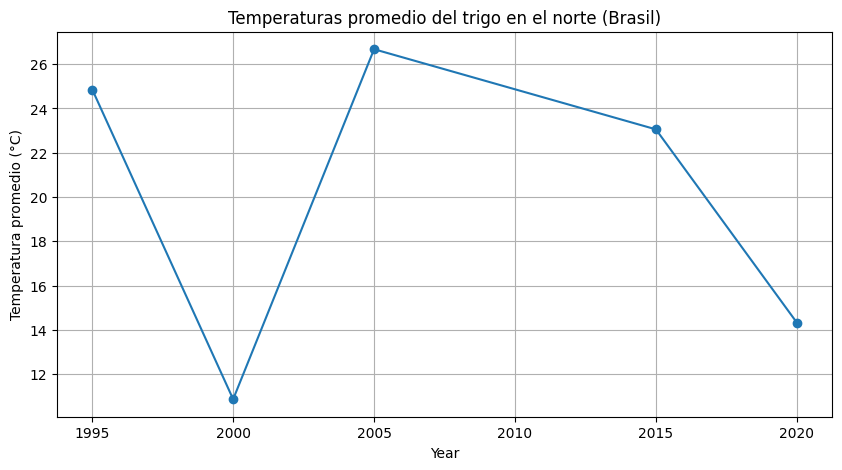

In [32]:
#Mostrar graficos comparativos entre 1990 - 2024
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    orden2['Year'],
    orden2['Average_Temperature_C'],
    marker='o'
)

plt.title('Temperaturas promedio del trigo en el norte (Brasil)')
plt.xlabel('Year')
plt.ylabel('Temperatura promedio (°C)')
plt.grid(True)

plt.show()

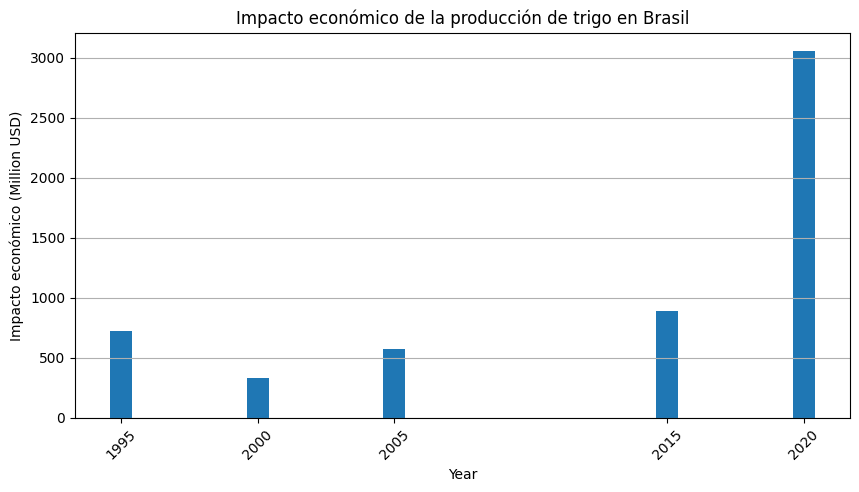

In [34]:
plt.figure(figsize=(10,5))
plt.bar(
    orden2['Year'],
    orden2['Economic_Impact_Million_USD']
)

plt.title('Impacto económico de la producción de trigo en Brasil')
plt.xlabel('Year')
plt.ylabel('Impacto económico (Million USD)')
plt.xticks(orden2['Year'], rotation=45)
plt.grid(axis='y')

plt.show()


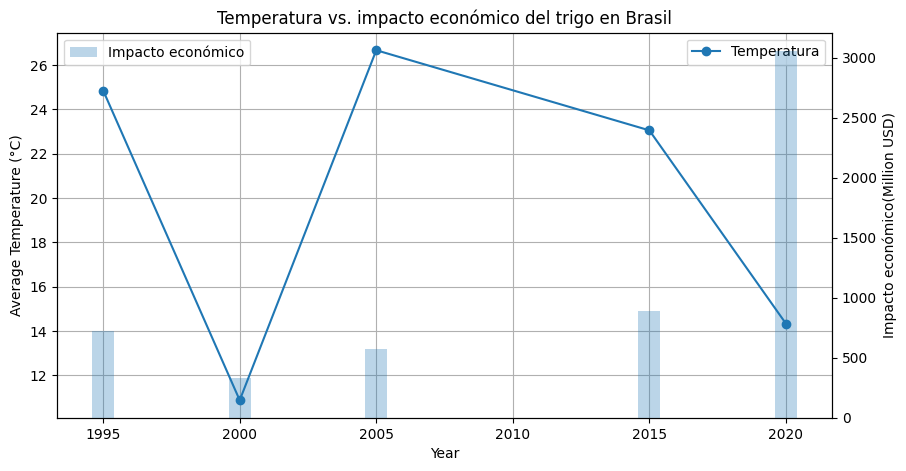

In [42]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Temperatura
ax1.plot(
    orden2['Year'],
    orden2['Average_Temperature_C'],
    marker='o',
    label='Temperatura'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)')
ax1.grid(True)
plt.legend()

# Impacto económico
ax2 = ax1.twinx()
ax2.bar(
    orden2['Year'],
    orden2['Economic_Impact_Million_USD'],
    alpha=0.3,
    label='Impacto económico'
)
ax2.set_ylabel('Impacto económico(Million USD)')


plt.title('Temperatura vs. impacto económico del trigo en Brasil')
plt.legend()
plt.show()